In [1]:
from pyevolve import G1DBinaryString
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import DBAdapters

%matplotlib inline

In [2]:
#fitness function
    
def fitness(chromosome):
    score = 0.0
    # iterate over the chromosome
    for value in chromosome:
        if value==1:
            score += 1
    return score

In [3]:
# Chromosome representation

# genome = bitstring
genome = G1DBinaryString.G1DBinaryString(20)

# how to compute the fitness
genome.evaluator.set(fitness)

# GA initialisation
ga = GSimpleGA.GSimpleGA(genome)
ga.setPopulationSize(100)
ga.setMutationRate(0.01)
ga.setCrossoverRate(0.9)
ga.selector.set(Selectors.GRouletteWheel)
ga.setElitism(True)

# Record evolution results in a database
sqlite_adapter = DBAdapters.DBSQLite(identify="log_bit-string")
ga.setDBAdapter(sqlite_adapter)

# Number of generations
ga.setGenerations(100)

# run the GA and print out stats every freq_stats generations
ga.evolve(freq_stats=10)

# Final best solution
print(ga.bestIndividual())

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [12.25(15.00)/7.99(5.00)/10.21(10.21)]
Gen. 10 (10.00%): Max/Min/Avg Fitness(Raw) [14.34(18.00)/10.39(8.00)/11.95(11.95)]
Gen. 20 (20.00%): Max/Min/Avg Fitness(Raw) [16.03(18.00)/10.85(9.00)/13.36(13.36)]
Gen. 30 (30.00%): Max/Min/Avg Fitness(Raw) [16.67(19.00)/11.78(10.00)/13.89(13.89)]
Gen. 40 (40.00%): Max/Min/Avg Fitness(Raw) [18.32(20.00)/11.87(10.00)/15.27(15.27)]
Gen. 50 (50.00%): Max/Min/Avg Fitness(Raw) [19.57(20.00)/11.62(11.00)/16.31(16.31)]
Gen. 60 (60.00%): Max/Min/Avg Fitness(Raw) [19.94(20.00)/11.09(11.00)/16.62(16.62)]
Gen. 70 (70.00%): Max/Min/Avg Fitness(Raw) [19.07(20.00)/12.88(12.00)/15.89(15.89)]
Gen. 80 (80.00%): Max/Min/Avg Fitness(Raw) [20.64(20.00)/10.81(12.00)/17.20(17.20)]
Gen. 90 (90.00%): Max/Min/Avg Fitness(Raw) [20.84(20.00)/11.60(13.00)/17.37(17.37)]
Gen. 100 (100.00%): Max/Min/Avg Fitness(Raw) [20.92(20.00)/10.06(12.00)/17.43(17.43)]
Total time elapsed: 1.292 seconds.
- GenomeBase
	Score:			 20.000000
	Fitness:		

In [1]:
# Generate a graph showing the evolutionary results: fitness vs generations
%run ./pyevolve_graph.py -i log_bit-string -2

Pyevolve 0.6rc1 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
100 generations found !


<Figure size 640x480 with 1 Axes>

In [3]:
%pwd

u'C:\\Users\\franc\\Dropbox\\HEIG-VD\\Semestre 5\\MLG\\Labo\\labGA\\labGA\\MLG_pyevolve_examples\\MLG_pyevolve_examples'

Pyevolve 0.6rc1 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
100 generations found !


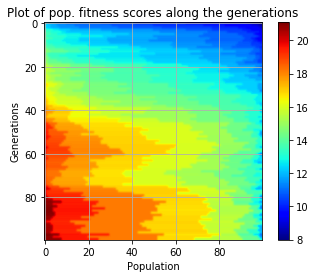

In [4]:
# Generate a heatmap of population fitness score distribution over generations
%run ./pyevolve_graph.py -i log_bit-string -9